In [1]:
import torch
from torch import nn # nn contain all of pytorch building blocks 
import matplotlib.pyplot as plt

# chaeck pytorch version
torch.__version__

'2.1.1+cu121'

In [2]:
## create known parameter 
weight =0.3
bias = 0.9
# y =a+ bi
# create
start =0
end = 1

step =0.01
X = torch.arange(start,end,step).unsqueeze(dim =1)
y = weight *X + bias

X[:10],y[:10] ,len(X) ,len(y)
X.shape

torch.Size([100, 1])

In [3]:
# create a train./test split
train_split =int(0.8 *len(X))
x_train,y_train = X[:train_split],y[:train_split]
x_test ,y_test =X[train_split:],y[train_split:]

In [4]:
x_train

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000],
        [0.1100],
        [0.1200],
        [0.1300],
        [0.1400],
        [0.1500],
        [0.1600],
        [0.1700],
        [0.1800],
        [0.1900],
        [0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900],
        [0.3000],
        [0.3100],
        [0.3200],
        [0.3300],
        [0.3400],
        [0.3500],
        [0.3600],
        [0.3700],
        [0.3800],
        [0.3900],
        [0.4000],
        [0.4100],
        [0.4200],
        [0.4300],
        [0.4400],
        [0.4500],
        [0.4600],
        [0.4700],
        [0.4800],
        [0.4900],
        [0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0

In [5]:
def plot_prediction(train_data = x_train,
                   train_label =y_train,
                   test_data = x_test,
                   test_label = y_test,
                   predictions = None):
    '''
    plot the data ,test data  and compress prediction '''

    plt.figure(figsize =(10,7))
    
    # plot training data in blue 
    plt.scatter(train_data,train_label,c='b',s=4,label = 'training data')

    # plot test data in green 
    plt.scatter(test_data,test_label,c='g',s=4,label = 'testing data')

    # are there prediction ?
    if predictions is not None:
        #plot the preediction  if they exist
        plt.scatter(test_data,predictions,c='r',s=4,label = 'predictions')
    plt.legend(prop={"size":14});


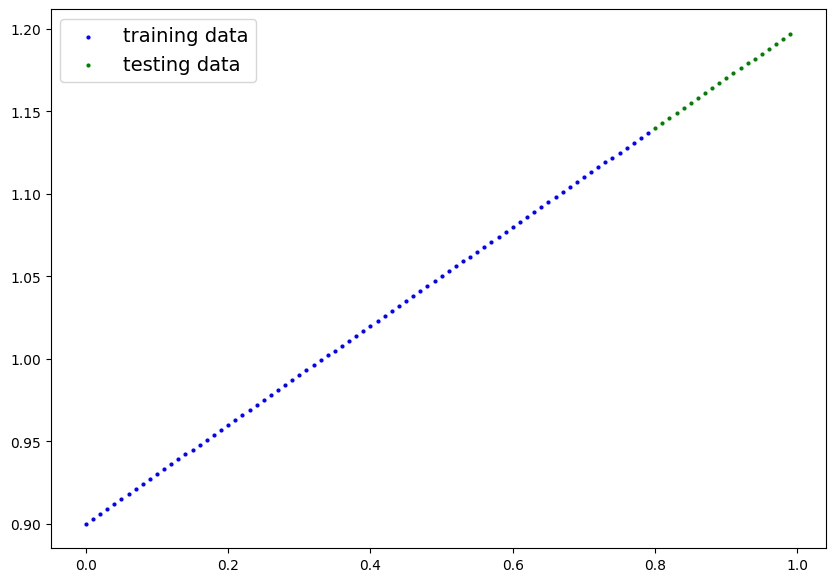

In [6]:
plot_prediction();

In [7]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                                                requires_grad =True, 
                                                dtype = torch.float))
        self.bias =nn.Parameter(torch.rand(1,requires_grad =True,
                                          dtype= torch.float))
        # forward method 
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias 
        
    

In [8]:
random_seed = 42
torch.manual_seed(random_seed)

model_0= LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [10]:
with torch.inference_mode():
    y_pred = model_0(x_test)
with torch.no_grad():
    y_pred =model_0(x_test)
y_pred

tensor([[0.6598],
        [0.6632],
        [0.6665],
        [0.6699],
        [0.6733],
        [0.6766],
        [0.6800],
        [0.6834],
        [0.6867],
        [0.6901],
        [0.6935],
        [0.6968],
        [0.7002],
        [0.7036],
        [0.7069],
        [0.7103],
        [0.7137],
        [0.7170],
        [0.7204],
        [0.7238]])

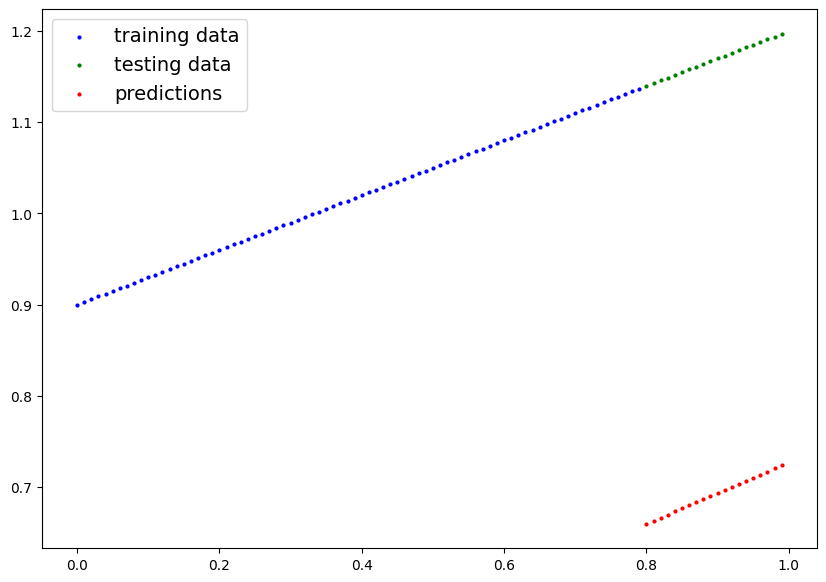

In [11]:
plot_prediction(predictions = y_pred)

In [12]:
loss_fn = nn.L1Loss()
#setup an optmizer 
optimizer = torch.optim.SGD(params = model_0.parameters(),
                          lr = 0.01 )  

In [13]:
list(model_0.eval().parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [14]:
epochs = 250

epoch_value =[]
loss_values =[]
test_loss_values=[]
# 0. loop through the data 
for epoch in range(epochs):
    # to training mode
    model_0.train() 

    #1 forward pass 
    y_pred = model_0(x_train)
    
    #2. calculate the loss
    loss = loss_fn(y_pred,y_train)
    print('loss : ',loss)
    print()
    
    #3. optmixer zero grad 
    optimizer.zero_grad()  
    
    
    loss.backward()
    
    #5. optimizer 
    optimizer.step()
    
    
    ## testing 
    model_0.eval() 
    with torch.inference_mode(): 
        #1 do the forward pass
        test_pred = model_0(x_test)\
    
        # calculate the loss
        test_loss =loss_fn(test_pred,y_test)
    if epoch %10 == 0:
       epoch_value.append(epoch)
       loss_values.append(loss)
       test_loss_values.append(test_loss)
       print(f"epoch :{epoch} | test : {loss} | test loss : {test_loss}")
    
       print(model_0.state_dict())

loss :  tensor(0.4951, grad_fn=<MeanBackward0>)

epoch :0 | test : 0.495059072971344 | test loss : 0.4631786346435547
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.4004]))])
loss :  tensor(0.4835, grad_fn=<MeanBackward0>)

loss :  tensor(0.4719, grad_fn=<MeanBackward0>)

loss :  tensor(0.4604, grad_fn=<MeanBackward0>)

loss :  tensor(0.4488, grad_fn=<MeanBackward0>)

loss :  tensor(0.4373, grad_fn=<MeanBackward0>)

loss :  tensor(0.4257, grad_fn=<MeanBackward0>)

loss :  tensor(0.4141, grad_fn=<MeanBackward0>)

loss :  tensor(0.4026, grad_fn=<MeanBackward0>)

loss :  tensor(0.3910, grad_fn=<MeanBackward0>)

loss :  tensor(0.3795, grad_fn=<MeanBackward0>)

epoch :10 | test : 0.37945666909217834 | test loss : 0.32782626152038574
OrderedDict([('weight', tensor([0.3801])), ('bias', tensor([0.5004]))])
loss :  tensor(0.3679, grad_fn=<MeanBackward0>)

loss :  tensor(0.3563, grad_fn=<MeanBackward0>)

loss :  tensor(0.3448, grad_fn=<MeanBackward0>)

loss :  tensor(0.3332, grad_

In [15]:
with torch.inference_mode():
    y_pred_new = model_0(x_test)
y_pred_new , y_test

(tensor([[1.1521],
         [1.1552],
         [1.1583],
         [1.1614],
         [1.1644],
         [1.1675],
         [1.1706],
         [1.1737],
         [1.1768],
         [1.1798],
         [1.1829],
         [1.1860],
         [1.1891],
         [1.1921],
         [1.1952],
         [1.1983],
         [1.2014],
         [1.2045],
         [1.2075],
         [1.2106]]),
 tensor([[1.1400],
         [1.1430],
         [1.1460],
         [1.1490],
         [1.1520],
         [1.1550],
         [1.1580],
         [1.1610],
         [1.1640],
         [1.1670],
         [1.1700],
         [1.1730],
         [1.1760],
         [1.1790],
         [1.1820],
         [1.1850],
         [1.1880],
         [1.1910],
         [1.1940],
         [1.1970]]))

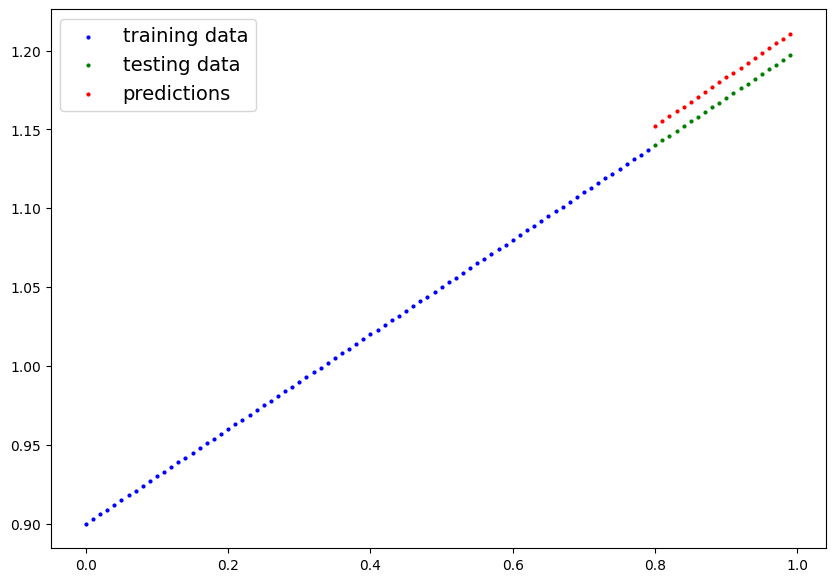

In [16]:
plot_prediction(predictions =y_pred_new)
